In [ ]:
from keras.datasets import mnist

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

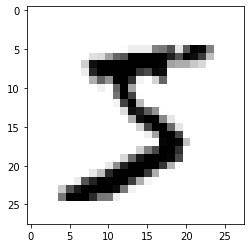

In [ ]:
plt.imshow(single_image, cmap='gray_r')

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#reshape x_train and x_test to add 4th dimension i.e. 1 channel for grayscale

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

#categorize y_train and y_test/ One-hot encoding

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
cat_y_train = to_categorical(y_train,10)
cat_y_test = to_categorical(y_test,10)

In [ ]:
cat_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#normalization

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [ ]:
x_train[0]

#train model

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

#conv2d layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#2d->1d
model.add(Flatten())

#dense layer
model.add(Dense(128,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(x_train,cat_y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1388 - accuracy: 0.9583
Epoch 2/2
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0493 - accuracy: 0.9855


#model evaluation

In [ ]:
model.evaluate(x_test,cat_y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0435 - accuracy: 0.9846


[0.04347861930727959, 0.9846000075340271]

In [ ]:
from sklearn.metrics import classification_report

#deprecated model.predict_classes

In [ ]:
#used when multi-class classification or when softmax is the last layer
predictions = np.argmax(model.predict(x_test), axis=-1)

#used when binary classification or sigmoid is last layer
#predictions = model.predict(x_test > 0.5).astype("int32")


In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

#reverse to_categorical

In [ ]:
import numpy as np
#predictions = np.argmax(predictions, axis=-1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from numpy.random import randint
from numpy import argmax
from keras.utils.np_utils import to_categorical
k = 8
n = 20
x = randint(0, k, (n,))
print(x)
print(argmax(to_categorical(x, k)))

[7 6 5 4 2 6 2 0 0 1 7 5 5 7 3 3 5 0 5 6]
7
